In [1]:
#Base Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
#Constants 

G = (6.67)*1e-8 #Gravitational Constant in CGS system of units. 
rEarth = (6371) * 1e5 #cm. Radius of Earth.
mEarth = (5.97) * 1e27 #grams
mMoon = (7.349) * 1e25 # grams
mSun = (1.98) * 1e33 #grams
aEarth = (1.49) * 1e13 #cm. Semi-major axis of Earth's orbit
aMoon = 3.84000 * 1e10 #cm. Semi-major axis of Moon.
IEarth = (0.3299) * mEarth * (rEarth**2) #moment of Inertia of Earth
lod = 86164 #seconds. lod-> length of the sidereal day.
angEarth = (2*np.pi) / lod #angular velocity of Earth
k2 = 0.298 #Dimensionless Love number of Earth.
QMoon = 11.5 #Dimensionless tidal quality factor.

# Question 1.

In [3]:
LEarth = (mEarth) * np.sqrt(G*(mSun + mEarth)*aEarth) #Orbital Angular Momentum of Earth in CGS Unit.
SEarth = IEarth * angEarth #Spin Angular Momentum of Earth in CGS Unit.
LMoon = (mMoon) * np.sqrt(G*(mMoon + mEarth)*aMoon) #Orbital Angular Momentum of Earth in CGS Unit.

In [4]:
print(LEarth, SEarth, LMoon)

2.648278362340409e+47 5.829427067103105e+40 2.8913500926978638e+41


# Question 2

In [5]:
TMoon = (3/2) * ((G*(mMoon**2)) / aMoon) * ((rEarth/aMoon)**5) * (k2/QMoon) #Lunar Tidal Torque in CGS unit.

In [6]:
TMoon #actual value 4.46*1e23

4.5839797522906684e+23

In [7]:
TSun = (1/4.7)*TMoon #Solar Tidal Torque in CGS Unit. This relation is given in the Project Reading.
TSun

9.753148409129082e+22

# Question 3

In [8]:
#Timescales Associated with Equations 1 - 3 from the Project Reading.

tLEarth = LEarth / TSun
tSEarth = SEarth / (-1*(TSun + TMoon))
tLMoon = LMoon / TMoon

In [9]:
print("Time Scale Associated with Orbital Angular Momentum of Earth: ", tLEarth)
print("Time Scale Associated with Spin Angular Momentum of Earth: ", tSEarth)
print("Time Scale Associated with Orbital Angular Momentum of Moon: ", tLMoon)

Time Scale Associated with Orbital Angular Momentum of Earth:  2.715306126031655e+24
Time Scale Associated with Spin Angular Momentum of Earth:  -1.0485911421621322e+17
Time Scale Associated with Orbital Angular Momentum of Moon:  6.307510610737367e+17


# Question 4

In [10]:
def T_Moon(lM):
    """
    This function calculates the lunar tidal torque. It is defined as a helper function for the next function. 
    """
    a_Moon = ((lM/mMoon)**2)/(G*(mEarth + mMoon))
    return (3/2) * ((G*(mMoon**2)) / a_Moon) * ((rEarth/a_Moon)**5) * (k2/QMoon)
    
aMoon_list = list()
def diff(y,t):
    
    """
    This Function returns the Derivatives of Orbital Angular Momentum of Earth and Moon and Spin Angular Momentum of Earth with respect to time.
    
    Input Parameters: y -> An Array Containing Orbital Angular Momentum of Eartn and Moon and Spin Angular Momentum of Earth.
    
    lE-> Orbital Angular Momentum of Earth
    sE -> spin Angular Momentum of Earth
    lM -> Orbital Angular Momentum of Moon.
    
    """
    lE, sE, lM = y
    dlEdt = (1/4.7)*T_Moon(lM)
    dsEdt = T_Moon(lM)*(-(1/4.7) - 1)
    dlMdt = T_Moon(lM)
    res = [dlEdt, dsEdt, dlMdt]
    return res

# Question 5

In [11]:
#I am choosing time to be from 0 to -5 billion years. 
"""
|t| = 1 refers to 1 seconds. 5 billion years approx = 1.5e17 seconds.

I am choosing total time points = 1e8. So, Delta t = 1500000015 seconds, approximately 50 years. 

So Each Point of time array, t is 50 years approximately to use for plotting.

"""

y0 = [LEarth,SEarth,LMoon]
t = np.linspace(0,-1.5e17,100000000)

In [12]:
t[0]

0.0

In [13]:
solutions = odeint(diff,y0,t)

C:\Users\Sarina-Rise\Documents\CTA200-FinalProject\env\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [14]:
solutions

array([[2.64827836e+47, 5.82942707e+40, 2.89135009e+41],
       [2.64827836e+47, 5.82942715e+40, 2.89135009e+41],
       [2.64827836e+47, 5.82942723e+40, 2.89135008e+41],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
solutions[32346197,2]

0.0

In [16]:
solutions[32346196,2]

2.5354612055130117e+39

## Above 2 lines compares Orbital Angular Momentum of the Moon. 

## From there we can see that our Model Predicts, Moon was Formed:
## 32346196 * 50 = 1.6 billion years ago. Relative to the Current Year = 0.


In [17]:
32346196*50

1617309800

# Question 6

In [18]:
aM_list = ((solutions[:,2]/mMoon)**2)/(G*(mEarth + mMoon))
aM_list

array([3.84000000e+10, 3.83999998e+10, 3.83999996e+10, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [19]:
i = np.where(aM_list == 0)
j = i[0][0] - 1
print(aM_list[j], aM_list[j+1], j)

2952866.43520085 0.0 32346196


In [20]:
#new time array for easy plotting.
t2 = np.arange(0,1e8)

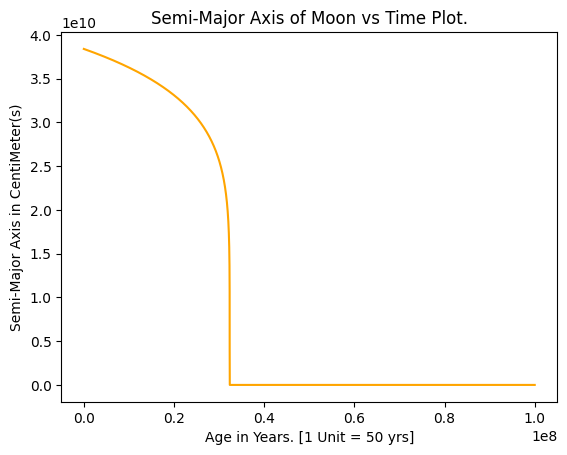

In [32]:
plt.title("Semi-Major Axis of Moon vs Time Plot.")
plt.xlabel("Age in Years. [1 Unit = 50 yrs]")
plt.ylabel("Semi-Major Axis in CentiMeter(s)")
plt.plot(t2,aM_list,color="orange")
plt.savefig("Q6.pdf")

# Question 7

## Data From: https://spacemath.gsfc.nasa.gov/Grade35/6Page58.pdf

In [22]:
time = np.array([0,70,220,290,340,380,395,410,420,430,440,450,510,600,900])
hours_in_day = np.array([24,23.7,23.5,22.9,22,22,21.6,21.4,21.9,21.2,20.8,21.2,20.7,21,18])

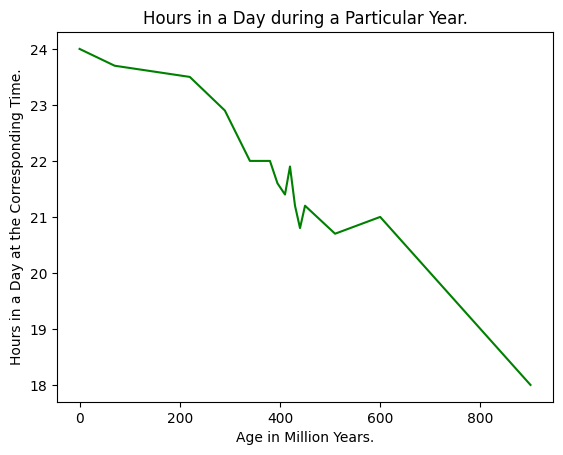

In [33]:
plt.title("Hours in a Day during a Particular Year.")
plt.xlabel("Age in Million Years.")
plt.ylabel("Hours in a Day at the Corresponding Time.")
plt.plot(time,hours_in_day,c="green")
plt.savefig("Q71.pdf")

# Question 7, 2nd Approach Using Spin Angular Momentum of Earth.

In [24]:
length_of_day = 1 / (solutions[:,1]/(IEarth*2*np.pi))

C:\Users\Sarina-Rise\AppData\Local\Temp\ipykernel_20680\1116466722.py:1: RuntimeWarning: divide by zero encountered in divide
  length_of_day = 1 / (solutions[:,1]/(IEarth*2*np.pi))


In [25]:
length_of_day[32346196]

12375.482957295522

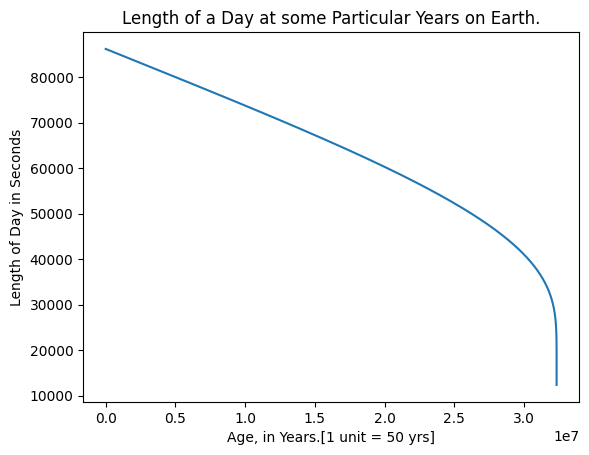

In [31]:
plt.plot(t2,length_of_day)
plt.xlabel("Age, in Years.[1 unit = 50 yrs]")
plt.ylabel("Length of Day in Seconds")
plt.title("Length of a Day at some Particular Years on Earth.")
plt.savefig("Q72.pdf")

# Question 8

In [27]:
#length of the day in seconds, at the time of moon formation. We are assuming, that moon formed just outside the Roche Radius.
print("Length of Day at the time of Moon Formation is " + str(length_of_day[32346196]) + " seconds")   

"""
The Result is Based on the Tidal Model Used in this Assignment.
"""

Length of Day at the time of Moon Formation is 12375.482957295522 seconds


'\nThe Result is Based on the Tidal Model Used in this Assignment.\n'

# Question 9

## Age of Moon: About 4.47 billion years old. Compared to The Tidal Model used in this Assignment, the Prediction by The Tidal Model is way off by almost 2.8 billion years.
## Age of Earth: About 4.54 billion years old, plus or minus about 50 million years.

## Source Links: 
### https://education.nationalgeographic.org/resource/resource-library-age-earth/
### https://www.nationalgeographic.com/science/article/140402-moon-formation-earth-age-space-science

# Question 10 Bonus Section

# Estimation of the Age of Earth and Moon using the Tidal Model in the Assignment, is very off from the actual age.

## The Possible Problem Could be the computation limit.

## Even though arithmetic calculation using a computer seems very fast and accurate, it has limitation when it comes to computation, Especially with floating Point. So Probably, the orbital angular momentum as they approach zero are treated as actual zero, which affected the age Estimation of Earth and Moon.

## Also, derivative of orbital angular momentum and the spin angular momentum of Earth, depend on the semi-major axis of the Moon. So, as soon as the semi-major axis of Moon goes to zero, any further data of Earth Collected using this model, becomes invalid too.